# Analyzing the Credit Risk of Online P2P Loans by Classification

# Machine Learning Final Project —— Chenghao Li, Kefan Xu

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span>
            <a href="#0.Introduction" data-toc-modified-id="0.Introduction-2">
                <span class="toc-item-num">0&nbsp;&nbsp;</span>Introduction</a>
        <li><span>
            <a href="#1.Data-Preprocessing-——-Part-1" data-toc-modified-id="1.Data-Preprocessing-——-Part-1-1">
                <span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing——Part 1</a>
            </span></li>
                <li><span>
            <a href="#2.-Data-Visualization" data-toc-modified-id="2.-Data-Visualization-1">
                <span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a>
                    <li><span>
            <a href="#3.-Data-Preprocessing-——-Part-2" data-toc-modified-id="3.-Data-Preprocessing-——-Part-2-1">
                <span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing——Part 2</a>
                        <li><span>
            <a href="#4.-Model-Implementaion" data-toc-modified-id="4.-Model-Implementaion-1">
                <span class="toc-item-num">4&nbsp;&nbsp;</span>Model Implementaion</a>
                            <li><span>
            <a href="#5.-Evaluate-the-models-and-Future-Improvement" data-toc-modified-id="5.-Evaluate-the-models-and-Future-Improvement-1">
                <span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate the models and Future Improvement</a>
                                <li><span>
            <a href="#6.-References-of-Source-Code" data-toc-modified-id="6.-References-of-Source-Code">
                <span class="toc-item-num">6&nbsp;&nbsp;</span>References of Source Code</a>
 
 
 
   </ul></div>

## 0.Introduction

In this project, we performed Multiclass Classification to predict the P2P loan grades (A, B, C, D, E, F, G) for the Lending Club data (google drive link of the data is here: https://drive.google.com/open?id=1PbUtRQCQJ72P0CFYk4QO8yo6syKj6RKC). We used different models and analyzed their performances. The innovative parts of this project are:
- Our feature engineering work is not only based on the visualiztion part, but is also closely related to the finance theories and literature review behind this topic. This will be discussed in detail in our final paper.
- We implemented some ensemble methods after trying all the classic models.
- We did some parameter tuning work and analyzed the pros and cons for each model we tried in the specific context of our project.

## 1.Data Preprocessing —— Part 1

In this part, we will explore the data and do some feature selection work based on our previous research as well as our finance knowledge. Details can be seen in the paper.

Our data is downloaded directly from Lending Club official website. We have done some preprocessing in Stata before importing it into the notebook. What we did are:
(1) Each observation has a string feature indicating the time when the loan was issued. The form of this feature is "Mon-Year". We decomposed it into two numeric features "year" and "month". Then we dropped the original feature.
(2) The loans are rated using a letter grade standard "A, B, C, D, E, F, G" and each letter grade has five subgrades. We created a new grade_score feature converting the letter grade into numeric value by the following standard (This mapping is only for making some visualization part easier, we will still use the letter grade when implementing the algorithms):
- A1~A5: 98~90
- B1~B5: 88~80
- C1~C5: 78~70
- D1~D5: 68~60
- E1~E5: 56~40
- F1~F5: 36~20
- G1~G5: 16~0

### (1) Import the data and explore the data

Data is here: https://drive.google.com/open?id=1PbUtRQCQJ72P0CFYk4QO8yo6syKj6RKC

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import the data
df = pd.read_csv("total_adj.csv")
df.head()

/Users/xukefan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,month,grade_score
0,NaN,NaN,7550,7550,7550.0,36 months,16.24%,266.34000,C,C5,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,12,70
1,NaN,NaN,27600,27600,27600.0,60 months,19.97%,730.78003,D,D5,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,12,60
2,NaN,NaN,8000,8000,8000.0,36 months,10.99%,261.88000,B,B2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,12,86
3,NaN,NaN,27050,27050,27050.0,36 months,10.99%,885.46002,B,B2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,12,86
4,NaN,NaN,4800,4800,4800.0,36 months,10.99%,157.13000,B,B2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2013,12,86


In [3]:
#showing the features
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'year', 'month',
       'grade_score'],
      dtype='object', length=148)


### (2) Sampling the big data

Since our dataset contains over 800,000 observations, it is very difficult for us to run the algorithms fast on our own laptops. 
Therefore, in this project, we will temporarily drop 29/30 of the dataset in order to implement the algorithms more efficiently. If we have extra time, will test the algorithms on a larger sample on HPC. 
Note that since each observation is a loan and our data is not a day/hour based time series data (we do have month and year), sampling will not make a big influence over the data. And since the observations are ordered by year and month, we did the sampling in the following way:

In [4]:
df['count'] = df.index
df['judge'] = df['count'] % 30 == 1
df_original = df #keep a copy of the original data
df = df[df['judge'] == True]
df.shape

(27239, 150)

### (3) Feature selection

Drop those features which are (1) can be inferred from other features (colinearlity), (2) useless information (we have done some literature review works and knew some of the features have very little explantory power), (3) have missing value for almost all the observations.

In [5]:
df = df.drop(columns = ['id', 'member_id','loan_amnt', 'funded_amnt_inv', 'url','installment', 'emp_title','issue_d', 'desc', 'title', 'pymnt_plan'])
df = df.drop(columns = ['revol_bal', 'initial_list_status','total_pymnt', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt'])
df = df.drop(columns = ['earliest_cr_line', 'mths_since_last_record','out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'])
df = df.drop(columns = ['collections_12_mths_ex_med','mths_since_last_delinq','mths_since_last_major_derog','policy_code', 'application_type' , 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq'])
df = df.drop(columns = ['tot_coll_amt','open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m','mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util'])
df = df.drop(columns = ['total_rev_hi_lim','inq_fi', 'total_cu_tl', 'inq_last_12m','avg_cur_bal', 'bc_open_to_buy', 'delinq_amnt',  'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term'])
df = df.drop(columns = ['mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq'])
df = df.drop(columns = ['num_bc_sats', 'num_actv_rev_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_op_past_12m'])
df = df.drop(columns = ['tax_liens','tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',  'total_il_high_credit_limit'])
df = df.drop(columns = ['revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util'])
df = df.drop(columns = ['sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_m'])
df = df.drop(columns = ['sec_app_mths_since_last_major_de', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount'])
df = df.drop(columns = ['hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status'])
df = df.drop(columns = ['orig_projected_additional_accrue', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method'])
df = df.drop(columns = ['debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status','count','judge'])
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,year,month,grade_score
1,27600,60 months,19.97%,D,D5,6 years,MORTGAGE,73000.0,Source Verified,Charged Off,...,3,5,11,1,87.500000,80.000000,0,2013,12,60
31,10000,36 months,11.99%,B,B3,10+ years,MORTGAGE,41000.0,Not Verified,Fully Paid,...,0,3,5,0,100.000000,66.699997,1,2013,12,84
61,13000,36 months,9.67%,B,B1,10+ years,MORTGAGE,102120.0,Not Verified,Fully Paid,...,0,4,8,0,91.699997,0.000000,0,2013,12,88
91,10000,36 months,7.62%,A,A3,4 years,RENT,85000.0,Not Verified,Fully Paid,...,0,4,5,0,95.500000,0.000000,0,2013,12,94
121,14125,60 months,19.97%,D,D5,NaN,RENT,35000.0,Verified,Fully Paid,...,0,3,15,0,100.000000,0.000000,1,2013,12,60


In [5]:
#list the features
print(df.columns)

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'tot_cur_bal', 'acc_open_past_24mths', 'bc_util',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_bc_tl', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'year', 'month', 'grade_score'],
      dtype='object')


In [6]:
#list the data types
df.dtypes

funded_amnt                   int64
term                         object
int_rate                     object
grade                        object
sub_grade                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
loan_status                  object
purpose                      object
zip_code                     object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_util                   object
total_acc                     int64
tot_cur_bal                   int64
acc_open_past_24mths          int64
bc_util                     float64
chargeoff_within_12_mths      int64
num_accts_ever_120_pd         int64
num_actv_bc_tl                int64
num_bc_tl                     int64
num_tl_90g_dpd_24m          

In [173]:
#df.to_csv("new_data_featured.csv") #keep a csv copy of the adjusted data.

### (4) Handling some special features

In [6]:
#Remove % sign 
df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)/100
df['revol_util'] = df['revol_util'].str.replace('%','').astype(float)/100

#Convert some percentage value to float
df['dti'] = df['dti'] / 100
df['bc_util'] = df['bc_util'] / 100
df['pct_tl_nvr_dlq'] = df['pct_tl_nvr_dlq'] / 100
df['percent_bc_gt_75'] = df['percent_bc_gt_75'] / 100
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,year,month,grade_score
1,27600,60 months,0.1997,D,D5,6 years,MORTGAGE,73000.0,Source Verified,Charged Off,...,3,5,11,1,0.875,0.800,0,2013,12,60
31,10000,36 months,0.1199,B,B3,10+ years,MORTGAGE,41000.0,Not Verified,Fully Paid,...,0,3,5,0,1.000,0.667,1,2013,12,84
61,13000,36 months,0.0967,B,B1,10+ years,MORTGAGE,102120.0,Not Verified,Fully Paid,...,0,4,8,0,0.917,0.000,0,2013,12,88
91,10000,36 months,0.0762,A,A3,4 years,RENT,85000.0,Not Verified,Fully Paid,...,0,4,5,0,0.955,0.000,0,2013,12,94
121,14125,60 months,0.1997,D,D5,NaN,RENT,35000.0,Verified,Fully Paid,...,0,3,15,0,1.000,0.000,1,2013,12,60


## 2. Data Visualization

In this part, in order to do more data preprocessing work, we need to visualize the data and check if there are any noticeable patterns. Note that we do have a short explanation below each graph we plotted.

In [8]:
print(df.columns)

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'tot_cur_bal', 'acc_open_past_24mths', 'bc_util',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_bc_tl', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'year', 'month', 'grade_score'],
      dtype='object')


Features we want to examine are:
- amount (funded_amnt): the amount of the loan
- term: the term of the loan
- grade: the grade of the loan given by the Lending Club
- verification_status: whether the source of the annual income claimed by the borrower was verified
- home_ownership: the house ownership of the borrower
- annual_inc: annual income of the borrower (claimed by the borrower)
- loan_status: the current status of the loan
- purpose: the purpose for the borrower to borrow the loan
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- state (addr_state): the state where the borrower comes from
- inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- open_acc: The number of open credit lines in the borrower's credit file.
- pub_rec: Number of public record bankruptcies
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc: The total number of credit lines currently in the borrower's credit file
- tot_cur_bal: Total current balance of all accounts
- acc_open_past_24mths: The number of credit lines opened in the last 24 months
- bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- chargeoff_within_12_mths: Number of charge-offs within 12 months
- num_accts_ever_120_pd: Number of accounts ever 120 or more days past due
- num_bc_tl: Number of bankcard accounts
- num_actv_bc_tl: Number of currently active bankcard accounts
- num_tl_90g_dpd_24m: Number of accounts 90 or more days past due in last 24 months
- pct_tl_nvr_dlq: Percent of trades never delinquent
- percent_bc_gt_75: Percentage of all bankcard accounts > 75% of limit.
- pub_rec_bankruptcies: Number of public record bankruptcies

### (1) Distribution of the grade_score

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


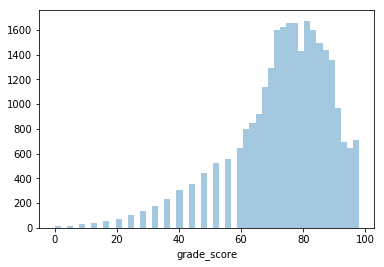

In [7]:
sns.distplot(df['grade_score'],kde = False)
plt.show()

**Implication**: Most of the loans were rated between 60 and 100. **There is a problem of unbalanced classes.** And we do care about those loans which are rated below 60 since the incorrect classification for low-rated loans is very costly in the reality.

### (2) Box Graph of Grade

Text(0.5,1,'Boxplot, Rating for states')

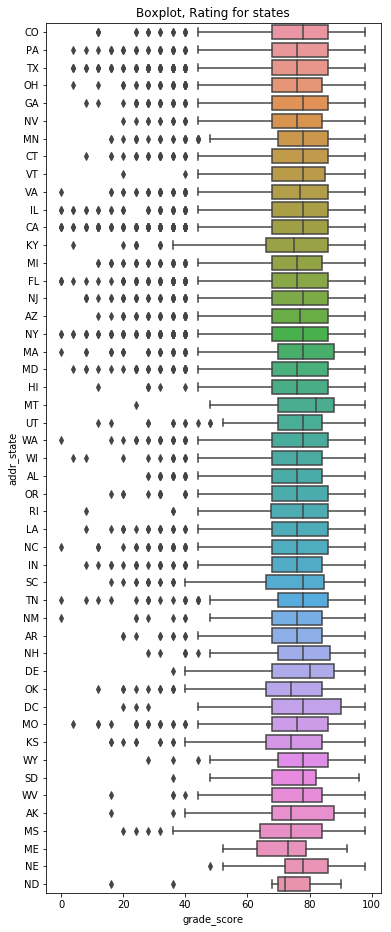

In [90]:
# Look at boxplot of grade_score over the states
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='addr_state',
    x='grade_score'
)
ax.set_title('Boxplot, Rating for states')

**Implication**: We observed that the grade scores of the P2P loans had almost the same distribution among all the states. This implies that the state feature might not have a lot of explantory power.

### (3) Distribution of Numeric Features

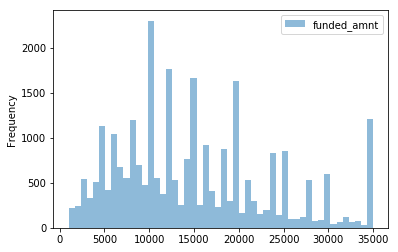

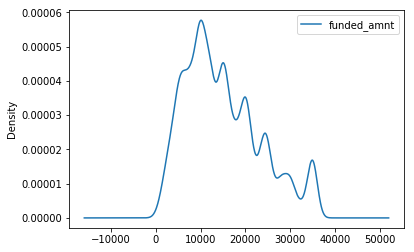

In [91]:
df[["funded_amnt",]].plot.hist(bins = 50, alpha = 0.5)
df[["funded_amnt",]].plot.kde()

The funded_amnt feature does not have a very nice distribution.

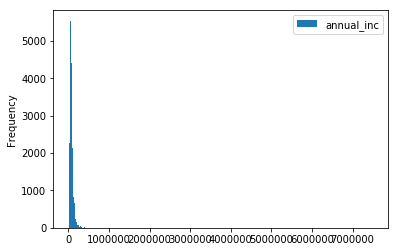

In [92]:
df[["annual_inc"]].plot.hist(bins = 500)

**Implication**: We can see from the annual income distribution above that most borrowers have an annual income below 100,000, which is reasonable.
But we have someone who **claimed** to have an annual income of 6,500,000, which is very likely to be a fake information. 
**Need to clean this data and remove outliers.**

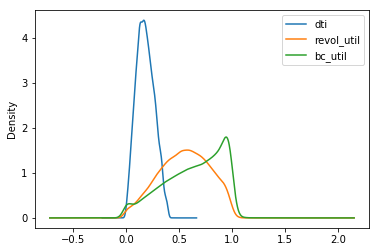

In [93]:
df[["dti", "revol_util","bc_util"]].plot.kde()

**Implication**: Both dti and revol_util have a very nice centralized distribution. Bc_util has a distribution skewed to the right.

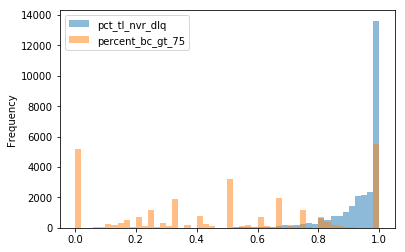

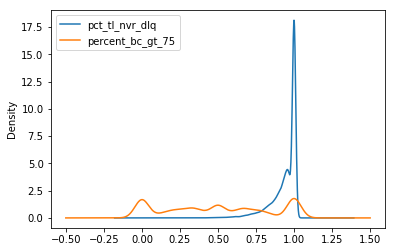

In [94]:
df[["pct_tl_nvr_dlq",'percent_bc_gt_75']].plot.hist(bins = 50,alpha=0.5)
df[["pct_tl_nvr_dlq",'percent_bc_gt_75']].plot.kde()

**Implication**: Most people never have any delinquent trading records, while the percentage of bankcards with balance greated than 75% of the limits is distributed almost uniformly between 0 and 1. 

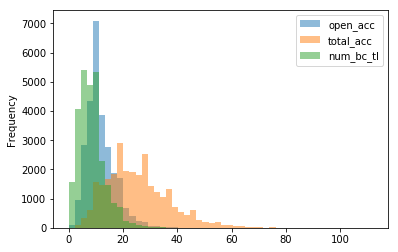

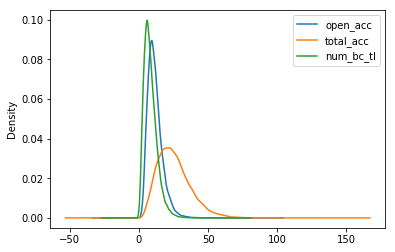

In [95]:
df[["open_acc","total_acc",'num_bc_tl']].plot.hist(bins = 50,alpha=0.5)
df[["open_acc","total_acc",'num_bc_tl']].plot.kde()

**Implication**: The above three features which indicate the number of credit lines and bank accounts have a highly similar distribution. **Strong correlation between these features can be observed.** We only need to keep one of them in our model in order to reduce the complexity.

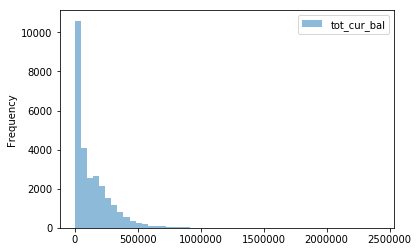

In [96]:
df[['tot_cur_bal']].plot.hist(bins = 50,alpha=0.5)

**Implication**: Again, we see there are some extreme outliers here. More data cleaning work should be done later.

### (4) Categorical Features' Frequency

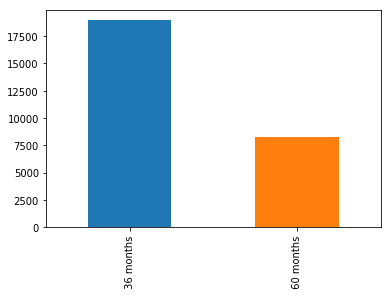

In [98]:
df["term"].value_counts().plot(kind = 'bar')

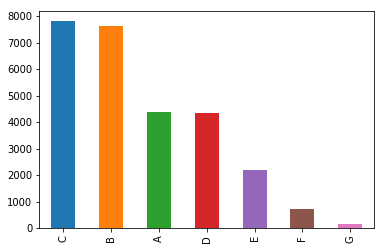

In [99]:
df["grade"].value_counts().plot(kind = 'bar')

**Implication**: Again, we noticed that the class distribution of our data is unbalanced. With the very few observations of "F" and "G" classes, our models might not have a very high predictive power over these classes.

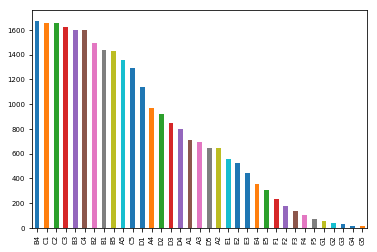

In [100]:
plt.rcParams['font.size'] = 7.0
df["sub_grade"].value_counts().plot(kind = 'bar')

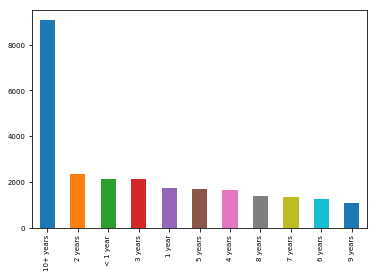

In [101]:
df["emp_length"].value_counts().plot(kind = 'bar')

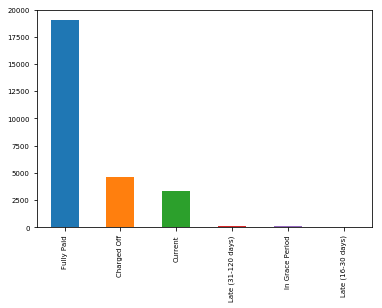

In [102]:
df["loan_status"].value_counts().plot(kind = 'bar')

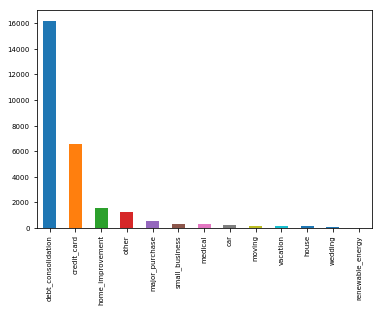

In [103]:
df["purpose"].value_counts().plot(kind = 'bar')

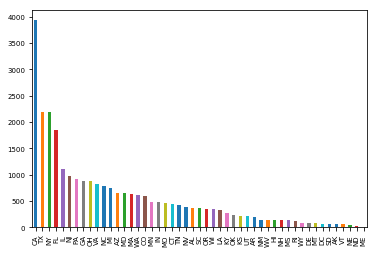

In [104]:
plt.rcParams['font.size'] = 7.0
df["addr_state"].value_counts().plot(kind = 'bar')

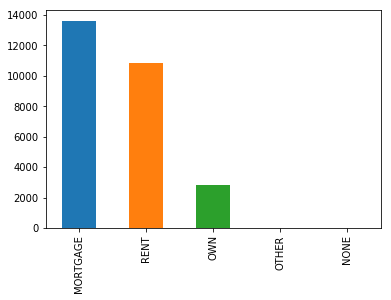

In [105]:
plt.rcParams['font.size'] = 10.0
df["home_ownership"].value_counts().plot(kind = 'bar')

**Implication**: From the above graphs, we see that most categorical features have very distinct distributions.

### (5) Correlation plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A758429208>,
      dtype=object)

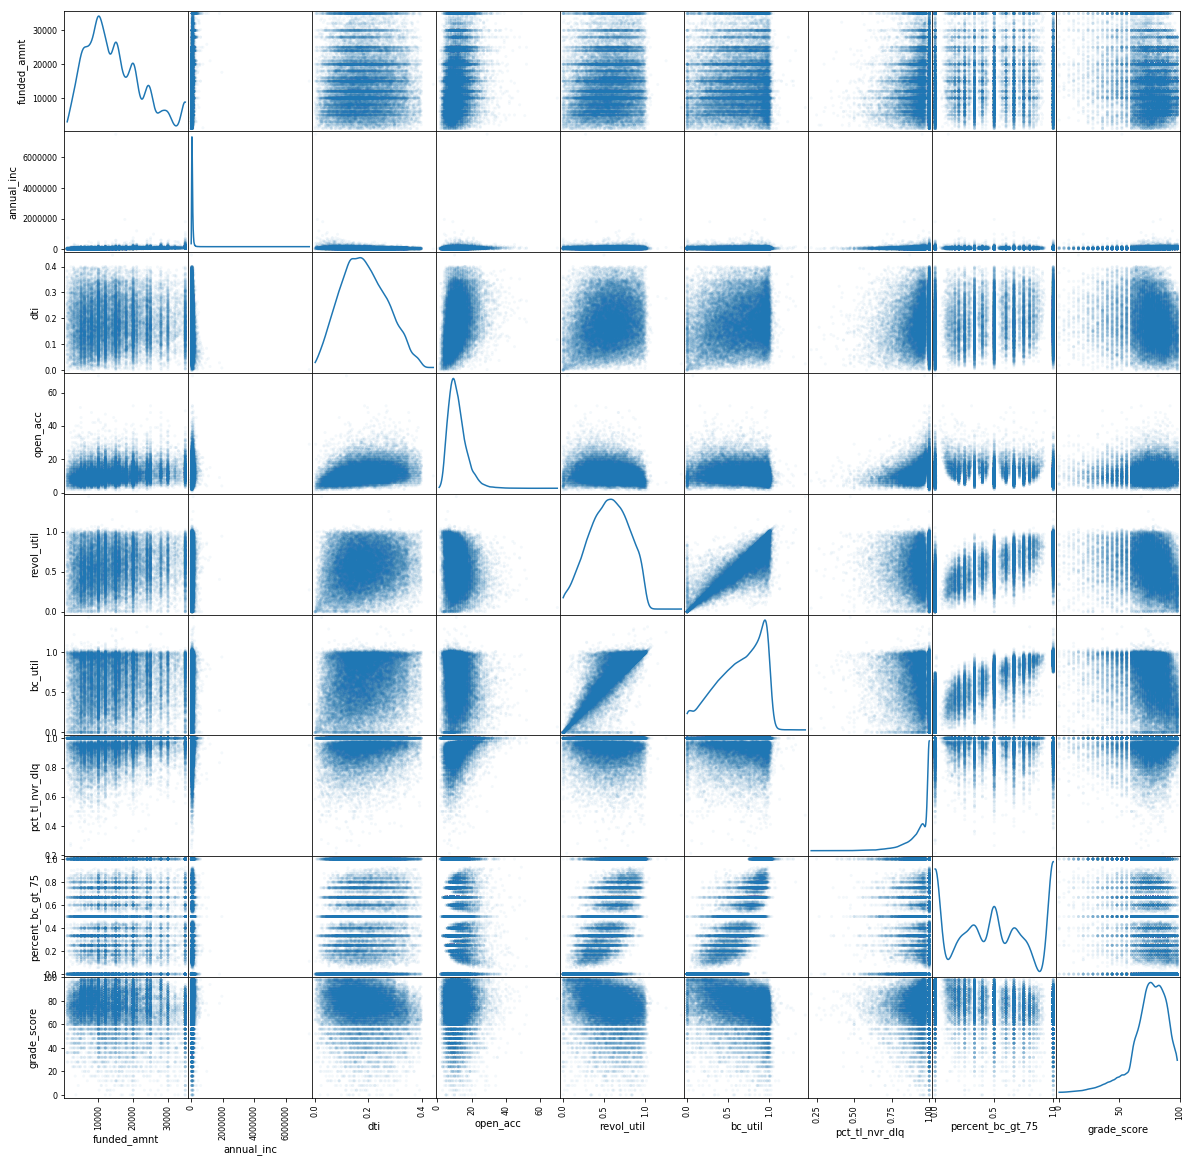

In [106]:
from pandas.plotting import scatter_matrix
names = ["funded_amnt","annual_inc","dti","open_acc","revol_util","bc_util","pct_tl_nvr_dlq",'percent_bc_gt_75','grade_score']
scatter_matrix(df[["funded_amnt","annual_inc","dti","open_acc","revol_util","bc_util","pct_tl_nvr_dlq",'percent_bc_gt_75','grade_score']],alpha = 0.05, diagonal = "kde", figsize = (20,20))


**Implication**: Since our dataset is a little bit large, the scatter plot didn't show any clear patterns. But we can still see there are some certain relationships among features. Also, we observed that features like annual_inc and open_acc have very large outliers, which need to be cleaned later. 

In [7]:
from pylab import rcParams
fig = rcParams['figure.figsize'] = 12,8
plt.rcParams['font.size'] = 12.0
data = df[["funded_amnt","annual_inc","dti","open_acc","revol_util","bc_util","pct_tl_nvr_dlq",'percent_bc_gt_75']]
data.dtypes

funded_amnt           int64
annual_inc          float64
dti                 float64
open_acc              int64
revol_util          float64
bc_util             float64
pct_tl_nvr_dlq      float64
percent_bc_gt_75    float64
dtype: object

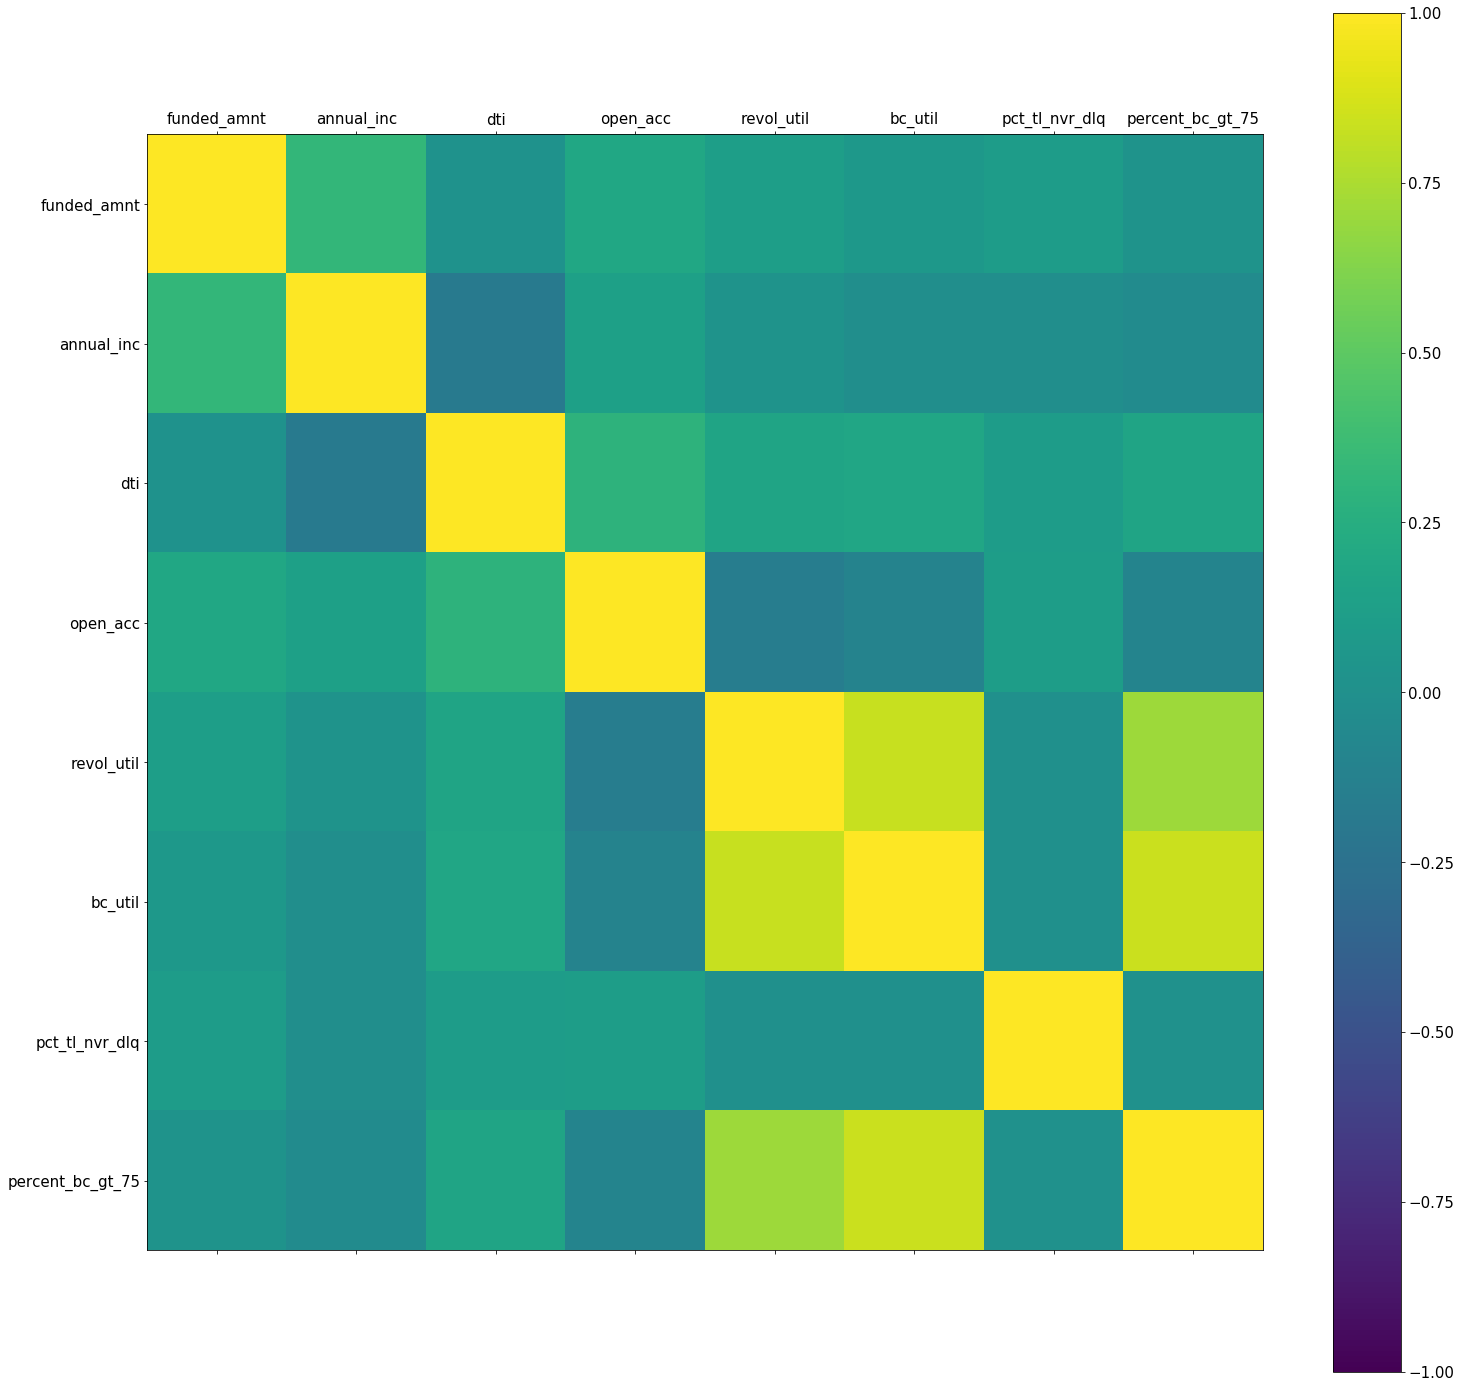

In [8]:
data = data.astype('float64')
names = ["funded_amnt","annual_inc","dti","open_acc","revol_util","bc_util","pct_tl_nvr_dlq",'percent_bc_gt_75']
correlations = data.corr()
plt.rcParams['font.size'] = 15.0
# plot correlation matrix
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**Implication:** We observe strong positive correlation among those bank-credit-related features and a relatively strong negative correlation between annual income and delinquency rate, which are reasonable. Correlation between features could increase the variance of our model.

## 3. Data Preprocessing —— Part 2

### (1) Results got from data visualization

- A lot of features contain extreme outliers. (like annual_income, total_cur_bal) 
- Some features have very strong correlation with each other (total_acc and num_bc_tl). We may want to keep only one feature.
- Some features do not have a nice centralized distribution. We need to normalize the data.


Before doing all the data cleaning work, we want to make a copy of the dataframe.

In [13]:
df_copy = df
print(df_copy.columns)

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'tot_cur_bal', 'acc_open_past_24mths', 'bc_util',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_bc_tl', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'year', 'month', 'grade_score'],
      dtype='object')


In [14]:
df = df_copy

### (2) Handling missing value

In [9]:
#count the missing values
df.isnull().sum()

funded_amnt                    0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                  1416
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_util                     8
total_acc                      0
tot_cur_bal                    0
acc_open_past_24mths           0
bc_util                      264
chargeoff_within_12_mths       0
num_accts_ever_120_pd          0
num_actv_bc_tl                 0
num_bc_tl                      0
num_tl_90g_dpd_24m             0
pct_tl_nvr_dlq                 6
percent_bc_gt_75             264
pub_rec_ba

We have 5 features which contain missing values. Among them, emp_length is a string feature while others are numeric features. We will use the fillna function to handle missing values by filling them with the next valid value.

In [10]:
df = df.fillna(method = 'bfill')
df.isnull().sum()

funded_amnt                 0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_util                  0
total_acc                   0
tot_cur_bal                 0
acc_open_past_24mths        0
bc_util                     0
chargeoff_within_12_mths    0
num_accts_ever_120_pd       0
num_actv_bc_tl              0
num_bc_tl                   0
num_tl_90g_dpd_24m          0
pct_tl_nvr_dlq              0
percent_bc_gt_75            0
pub_rec_bankruptcies        0
year                        0
month                       0
grade_scor

### (3) Creating dummies

Now we will create dummies for those categorical features. We have the following categorical features: term, emp_length, home_ownership, verification_status, loan_status, purpose. (zipcode, state have been shown irrelevant)

In [11]:
df = pd.concat([df, pd.get_dummies(df['term'])], axis=1); df
df = pd.concat([df, pd.get_dummies(df['emp_length'])], axis=1); df
df = pd.concat([df, pd.get_dummies(df['home_ownership'])], axis=1); df
df = pd.concat([df, pd.get_dummies(df['verification_status'])], axis=1); df
df = pd.concat([df, pd.get_dummies(df['loan_status'])], axis=1); df
df = pd.concat([df, pd.get_dummies(df['purpose'])], axis=1); df
df = pd.concat([df, pd.get_dummies(df['year'])], axis=1); df
df = pd.concat([df, pd.get_dummies(df['month'])], axis=1); df
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,3,4,5,6,7,8,9,10,11,12
1,27600,60 months,0.1997,D,D5,6 years,MORTGAGE,73000.0,Source Verified,Charged Off,...,0,0,0,0,0,0,0,0,0,1
31,10000,36 months,0.1199,B,B3,10+ years,MORTGAGE,41000.0,Not Verified,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
61,13000,36 months,0.0967,B,B1,10+ years,MORTGAGE,102120.0,Not Verified,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
91,10000,36 months,0.0762,A,A3,4 years,RENT,85000.0,Not Verified,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
121,14125,60 months,0.1997,D,D5,5 years,RENT,35000.0,Verified,Fully Paid,...,0,0,0,0,0,0,0,0,0,1


In [18]:
list(df.columns)

['funded_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'tot_cur_bal',
 'acc_open_past_24mths',
 'bc_util',
 'chargeoff_within_12_mths',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_bc_tl',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'year',
 'month',
 'grade_score',
 ' 36 months',
 ' 60 months',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 'Not Verified',
 'Source Verified',
 'Verified',
 'Charged Off',
 'Current',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)',
 'car',
 'credit_card',
 'debt_consolidation',
 'home_improvement',
 'house',

### (4) Handling outliers

We now drop some of the outliers which have been identified from the data visualization part. We will drop those observations which are 3 standard deviations above the mean. Mean and SD haven been calculated in csv beforehand. **Note that dropping too many outliers could reduce the predictive power of our model.**

In [12]:
#Make a copy of the original dataset
df2 = df

In [13]:
#Convert df to the original version
df =df2

In [14]:
print("Shape before: ", df.shape)
df = df[df['annual_inc'] < 300000]
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (27239, 90)
Shape after:  (27062, 90)


In [15]:
print("Shape before: ", df.shape)
df = df[df['dti'] < 0.42]
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (27062, 90)
Shape after:  (27061, 90)


In [16]:
print("Shape before: ", df.shape)
df = df[df['open_acc'] < 40]
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (27061, 90)
Shape after:  (27030, 90)


In [17]:
print("Shape before: ", df.shape)
df = df[df['pub_rec'] < 15]
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (27030, 90)
Shape after:  (27030, 90)


In [18]:
print("Shape before: ", df.shape)
df = df[df['tot_cur_bal'] < 5900000]
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (27030, 90)
Shape after:  (27030, 90)


### (5) Visualizing clearned data

We have finished almost all the data preprocessing work. We now want to visualize the cleaned data.

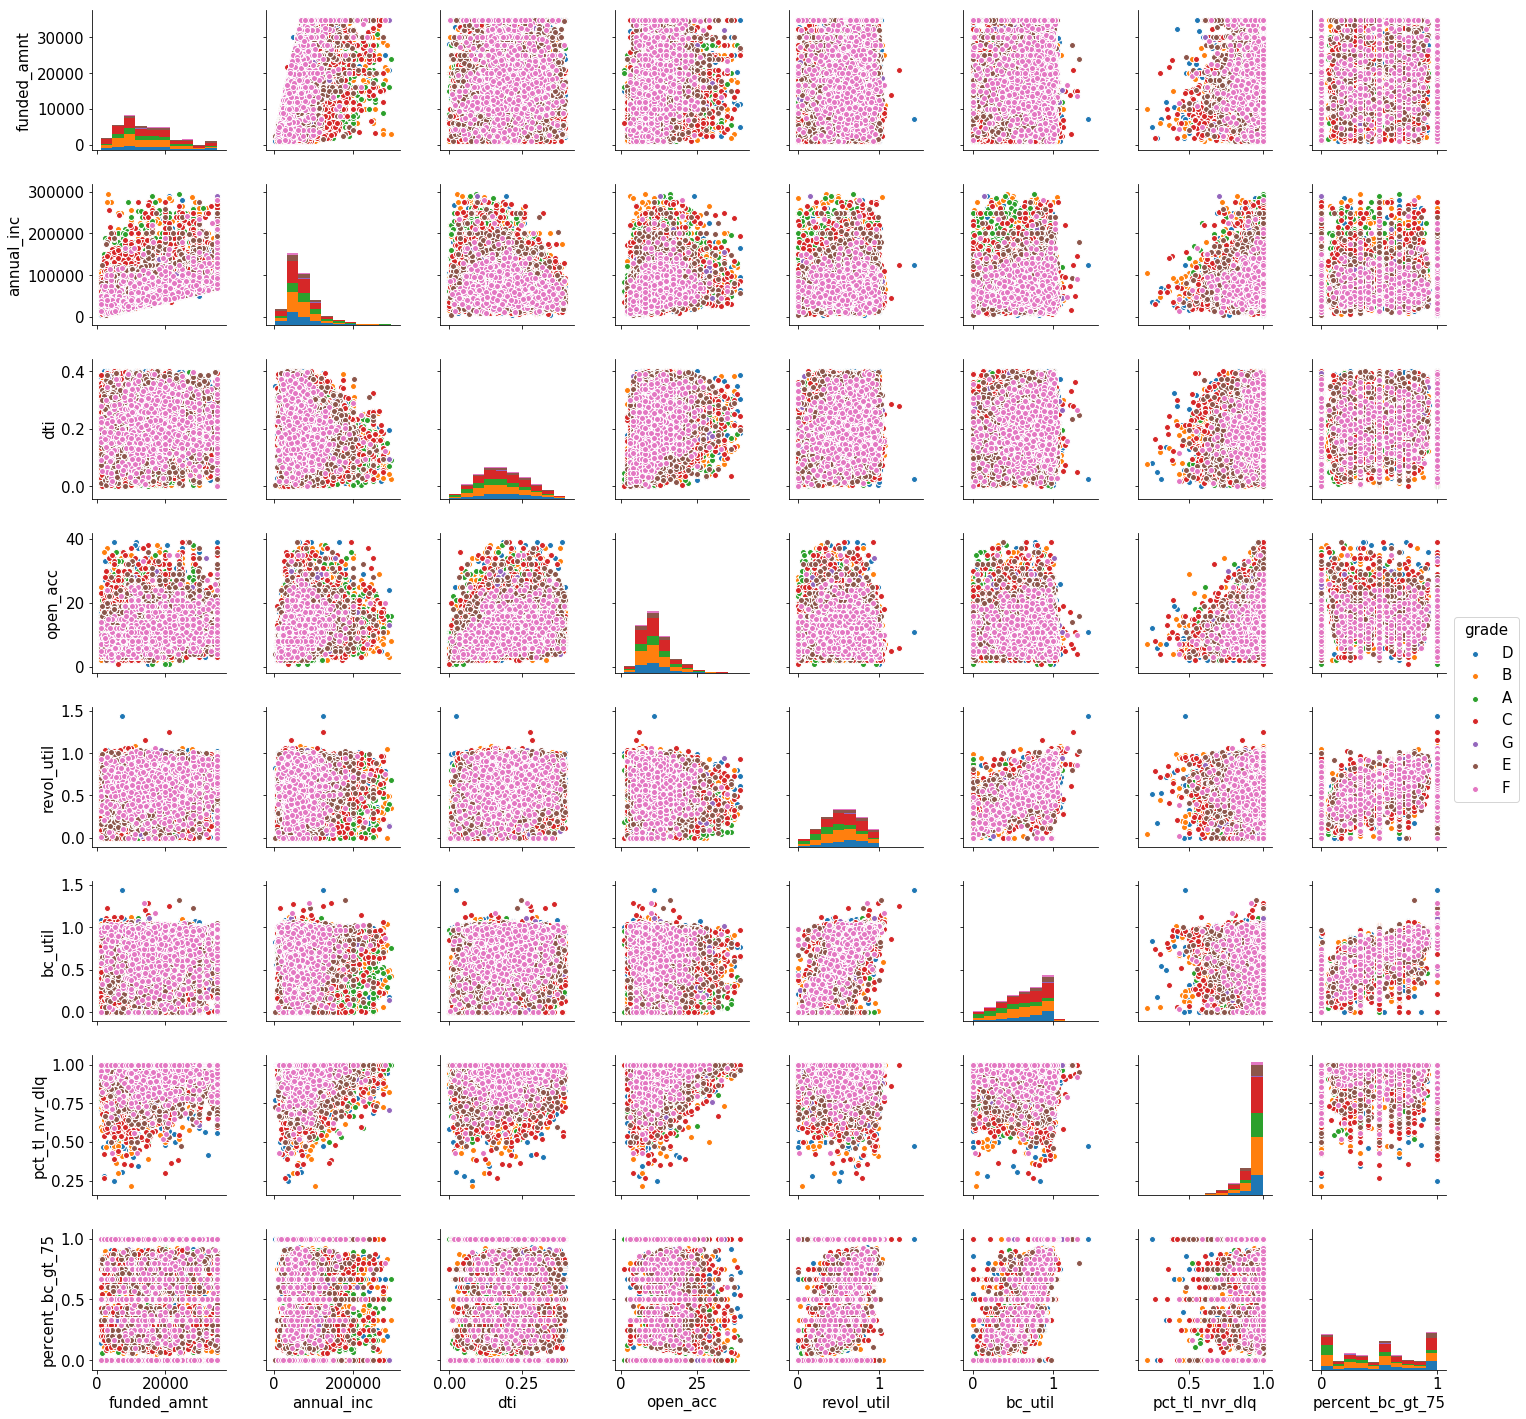

In [23]:
sns.pairplot(df[["funded_amnt","annual_inc","dti","open_acc","revol_util","bc_util","pct_tl_nvr_dlq",'percent_bc_gt_75','grade']],hue='grade')

**Implication**: After cleaning the data, we no longer have extreme outliers. Here we observed that due to the large number of observations, the points of different classes seem to gather together. However, we can still see **there are certain boundaries existing between classes**.

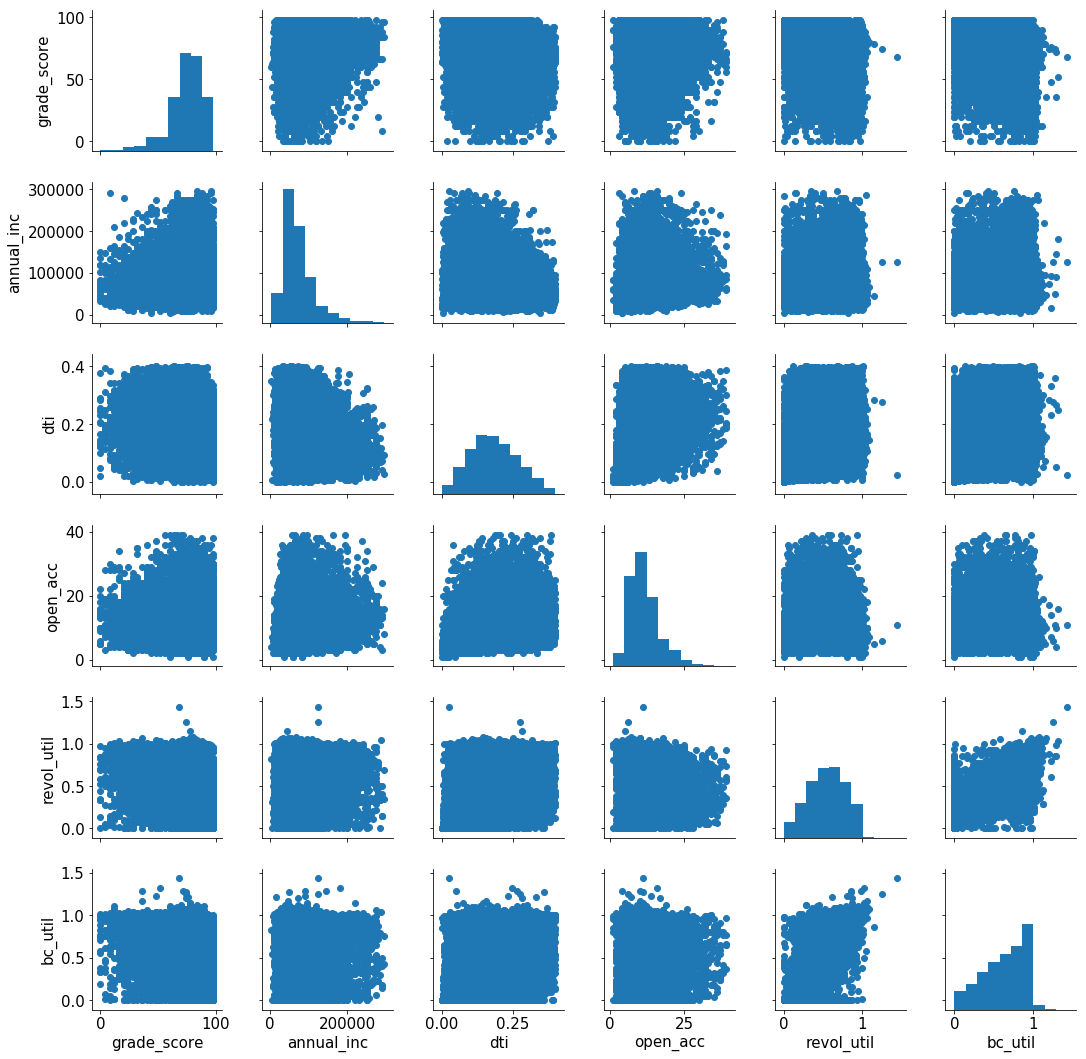

In [122]:
g = sns.PairGrid(df, vars=["grade_score", 'annual_inc', 'dti', 'open_acc', 'revol_util','bc_util'], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

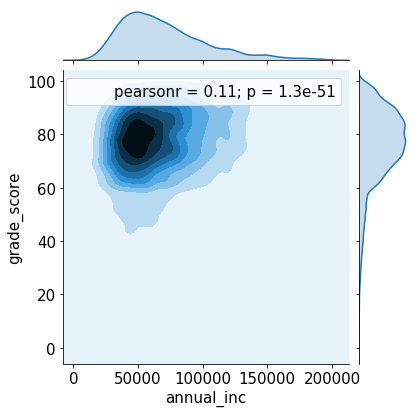

In [41]:
sns.jointplot('annual_inc', 'grade_score', df, kind="kde")

plt.show()

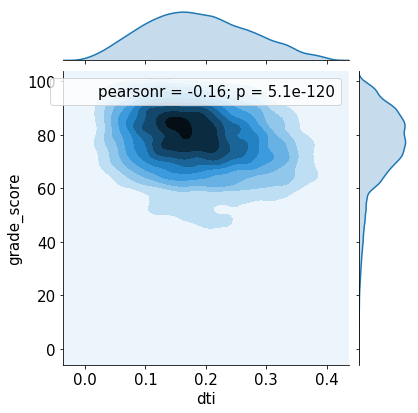

In [42]:
sns.jointplot('dti', 'grade_score', df, kind="kde")

plt.show()

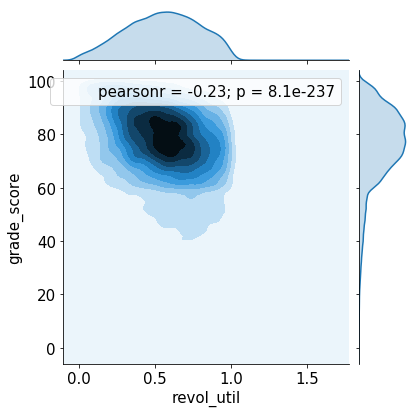

In [43]:
sns.jointplot('revol_util', 'grade_score', df, kind="kde")

plt.show()

### (6) Drop unneeded features

Now we will drop those unneeded features:
- drop the target variable (y) from X and drop the features which can be inferred directly from y (grade_score, int_rate, sub_grade)
- drop state, zipcode, which are irrelevant in our model
- drop one dummy for each of the dummy feature
- drop those categorical variables which have be replaced by the dummies
- drop features which haven been shown that have strong correlation with other features

In [19]:
df_copy2 = df
#Again, we want to keep a copy of our df
#df = df_copy2

In [20]:
df['grade'] = df['grade'].astype('category')
list(df.columns)

['funded_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'tot_cur_bal',
 'acc_open_past_24mths',
 'bc_util',
 'chargeoff_within_12_mths',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_bc_tl',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'year',
 'month',
 'grade_score',
 ' 36 months',
 ' 60 months',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 'Not Verified',
 'Source Verified',
 'Verified',
 'Charged Off',
 'Current',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Late (31-120 days)',
 'car',
 'credit_card',
 'debt_consolidation',
 'home_improvement',
 'house',

In [21]:
df.shape #check shape

(27030, 90)

In [22]:
Y = df['grade']
X = df.drop(columns = ['int_rate', 'grade_score', 'grade', 'term','sub_grade','total_acc', 'emp_length','home_ownership', 'verification_status', 'loan_status',
                      'purpose', 'zip_code','addr_state', 'year','month', ' 36 months', '1 year', 'OTHER','Not Verified', 'In Grace Period', 'other',2015,1])
print(X)
print(Y)
X.shape

        funded_amnt  annual_inc     dti  delinq_2yrs  inq_last_6mths  \
1             27600     73000.0  0.2313            1               1   
31            10000     41000.0  0.2579            0               1   
61            13000    102120.0  0.1585            1               2   
91            10000     85000.0  0.1211            1               0   
121           14125     35000.0  0.2617            0               0   
151           24000    135000.0  0.0897            0               2   
181           25000     84087.0  0.1554            0               1   
211           20000     85000.0  0.2433            2               4   
241           25000     90000.0  0.2429            1               2   
271            7000     42740.0  0.2286            0               1   
301           35000    135000.0  0.1275            1               2   
331           10000     60000.0  0.1642            0               0   
361           15000     36000.0  0.1250            0            

(27030, 67)

###  (7) Train-test split

We now split the training and testing data. In order to make the future adjustment more convenient, we fixed the random state.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 1111)
X_train.shape

(18921, 67)

In [24]:
x_train = X_train.values
y_train = Y_train.values
x_test = X_test.values
y_test = Y_test.values
x = X.values
y = Y.values
print(x_train, y_train)

[[1.5000000e+04 3.8300000e+04 2.4950001e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.2000000e+03 5.5000000e+04 1.7629999e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.5000000e+04 8.5000000e+04 3.3619999e-01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.5000000e+04 6.0000000e+04 3.2220001e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.6000000e+04 6.7000000e+04 2.5070000e-01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.8000000e+04 9.0000000e+04 2.4490000e-01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]] [B, C, D, C, C, ..., A, D, C, C, D]
Length: 18921
Categories (7, object): [A, B, C, D, E, F, G]


### (8) Convert categorical grade into integer value

String value classes "A" ~ "F" need to be converted into integer value "1" ~ "7" in order to make the algorithms work. Here we used LaberEncoder to do the job.

In [25]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)
le_grade_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
y_train_adj = le.transform(y_train)
adj = np.array([1] * len(y_train_adj)) #add 1 to convet 0~6 to 1~7
y_train_adj += adj
y_train_adj

array([2, 3, 4, ..., 3, 3, 4])

In [26]:
adj = np.array([1] * len(y_test))
y_test_adj = le.transform(y_test)
y_test_adj += adj
y_test_adj

array([5, 2, 1, ..., 5, 4, 5])

## 4. Model Implementaion

There are many classification models in sklearn for us to choose from. In this project, we will use the following models and then compare their results. Note that all the models are implemented through cross-validation. Moreover, we use Grid Search for all the algorithms in order to tune the parameters.

- Multiclass Logistic Regression
- Multiclass KNN
- Random Forest
- Decision Tree
- Multiclass Neural Network using MLPClassifier
- Support Vector Machine
- Naive Bayes
- Multiclass Neural Network using Keras (if time allows)

### (1) Normalize the data and import relevant packages

Before implementing the machine learning algorithms, we need to normalize the data. Here we used RobustScaler to do the job.

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report

In [28]:
robust = MinMaxScaler().fit(x)
x_train_nor = robust.transform(x_train)
x_test_nor = robust.transform(x_test)
print(x_train_nor)

[[0.41176471 0.11847527 0.62390597 ... 0.         0.         0.        ]
 [0.18235294 0.17582418 0.44086017 ... 0.         0.         0.        ]
 [1.         0.27884615 0.84071011 ... 1.         0.         0.        ]
 ...
 [0.70588235 0.19299451 0.80570141 ... 0.         0.         0.        ]
 [0.44117647 0.21703297 0.6269067  ... 0.         0.         0.        ]
 [0.5        0.29601648 0.61240307 ... 1.         0.         0.        ]]


In [29]:
x_train_nor.shape

(18921, 67)

In [30]:
y_test_adj.shape

(8109,)

In [31]:
print(y_train_adj, y_test_adj)

[2 3 4 ... 3 3 4] [5 2 1 ... 5 4 5]


### (2) Show the distribution of classes and find the baseline score for classification models

In our project, we have 7 classes. A simple way to calculate the baseline is to just calculate  $\frac{1}{7}$ = 0.143. This means that if we randomly guess classes, we should get an accuracy score of 14.3% at least.

**Important:** However, this method ignores the original distribution of the classes in the data. A very important point when doing classification is to check the distribution of different classes. Unbalanced class distribution could make the accuracy scores misleading. Also, showing the distribution of different classes can help us find a better baseline accuracy score for our problem.

In [63]:
count_number = pd.value_counts(pd.Series(y_test))
count_number

C    2309
B    2275
A    1330
D    1306
E     639
F     202
G      48
dtype: int64

In [64]:
Percentage = round((count_number * 100/ len(y_test)), 2)
Percentage

C    28.47
B    28.06
A    16.40
D    16.11
E     7.88
F     2.49
G     0.59
dtype: float64

**Implication:**  We can see that the largest class is "C", which consists of 28.47%. Therefore, the baseline accuracy score for our model should be 28.47%. If we have a higher accuracy score than this, our model is doing "something"!

### (3) Multiclass Logistic Regression

Logistic Regression is one of the fundamental classification methods. It is often used for binary classifications since Sigmoid function gives probability of the two classes between 0 and 1. For Multiclass predictions, this model works in the one-vs-all way: it trains multiple logistic regression classifiers, one for each of the K classes in the training dataset. In this model, we tuned the parameter "C", which is the inverse of regularization strength.

We tuned the parameters using grid search with 10 partitions from 0.01 to 100, then 0.01 to 25, then 0.01 to 5, then 0.01 to 2 etc.

**Characteristic:** Logistic Regression is designed to be a very efficient algorithm so it computes very fast. But in some cases, since logistic regression is a simple algorithm, its accuracy may be lower compare to other complex algorithms.

In [137]:
from sklearn.linear_model import LogisticRegression
 
lg = LogisticRegression(solver = 'lbfgs',random_state = 0, multi_class  = "multinomial")
param_grid0 = {'C': np.linspace(0.8, 1, 10)}

grid_search0 = GridSearchCV(lg, param_grid = param_grid0, scoring='accuracy', cv=5, return_train_score=True)

grid_search0.fit(x_train_nor, y_train_adj.ravel()) 

print("Scores on training set:")
means = grid_search0.cv_results_['mean_test_score']
stds = grid_search0.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search0.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Scores on training set:
0.449 (+/-0.004) for {'C': 0.8}
0.449 (+/-0.004) for {'C': 0.8222222222222223}
0.449 (+/-0.006) for {'C': 0.8444444444444444}
0.450 (+/-0.005) for {'C': 0.8666666666666667}
0.449 (+/-0.006) for {'C': 0.888888888888889}
0.450 (+/-0.006) for {'C': 0.9111111111111111}
0.449 (+/-0.005) for {'C': 0.9333333333333333}
0.449 (+/-0.006) for {'C': 0.9555555555555555}
0.449 (+/-0.005) for {'C': 0.9777777777777777}
0.449 (+/-0.004) for {'C': 1.0}


Clearly, little improvement could be achieved with 'C' greater than 0.9. This is a good parameter for Logistic Regression in our problem.

In [138]:
print(grid_search0.best_params_)

{'C': 0.9111111111111111}


In [171]:
Logistic_Reg = grid_search0.best_estimator_.fit(x_train_nor, y_train_adj)
y_hat = Logistic_Reg.predict(x_test_nor)
Logistic_Regression_score =Logistic_Reg.score(x_test_nor, y_test_adj)
print("Logistic Regression Score on Testing set: ", end='')
print(Logistic_Regression_score)

Logistic Regression Score on Testing set: 0.45394006659267483


Training and Testing sets have very close accuracy scores.

In [142]:
confusion_log_regr = confusion_matrix(y_test_adj, y_hat)
confusion_log_regr

array([[ 722,  522,   83,    3,    0,    0,    0],
       [ 285, 1221,  729,   34,    6,    0,    0],
       [  84,  673, 1315,  182,   54,    1,    0],
       [  18,  193,  724,  262,  106,    2,    1],
       [   2,   36,  287,  154,  157,    3,    0],
       [   0,    4,   66,   58,   70,    4,    0],
       [   0,    0,    8,    9,   29,    2,    0]], dtype=int64)

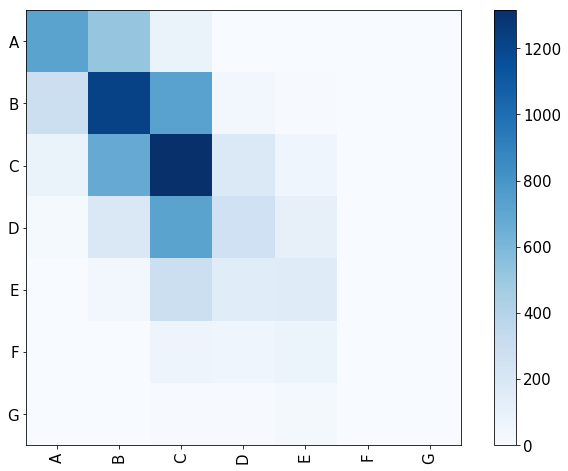

In [143]:
columns = ['A', 'B', 'C', 'D','E','F','G']

plt.imshow(confusion_log_regr, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,], columns)
plt.colorbar()

plt.show()

In [144]:
print(classification_report(y_test_adj, y_hat))

             precision    recall  f1-score   support

          1       0.65      0.54      0.59      1330
          2       0.46      0.54      0.50      2275
          3       0.41      0.57      0.48      2309
          4       0.37      0.20      0.26      1306
          5       0.37      0.25      0.30       639
          6       0.33      0.02      0.04       202
          7       0.00      0.00      0.00        48

avg / total       0.45      0.45      0.44      8109



**Comment:** Logistic Regression shows good overall performance. This may be because that Logistic Regression is very easy to tune the parameters. Also, sometimes a simple model can fit the data well.

### (4) KNeighborsClassifier

KNN algorithm basically classifies data by finding the K nearest data points to it measured by a distance function. Then it assigns to the class which is the  most common among its K nearest neighbors.

**Characteristic:** KNN works on similarity measures. The accuracy of the model depends greatly on the data itself (KNN is very sensitive to the noises). Finding a good "K" is not very easy and large N requires a lot of calculations. KNN takes a very long time to compute with grid search.

In [176]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parameters = {
    'n_neighbors': [9, 15, 21, 29],    #odd number works better in KNN
}

grid_search = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=5, return_train_score=True)

grid_search.fit(x_train_nor, y_train_adj.ravel()) 


print("Scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))


print(grid_search.cv_results_) 
print(grid_search.best_params_)

Scores on training set:
0.330 (+/-0.019) for {'n_neighbors': 9}
0.342 (+/-0.024) for {'n_neighbors': 15}
0.349 (+/-0.019) for {'n_neighbors': 21}
0.354 (+/-0.010) for {'n_neighbors': 29}
{'mean_fit_time': array([0.14581861, 0.13304782, 0.14241304, 0.14360371]), 'std_fit_time': array([0.01965701, 0.00731691, 0.01424468, 0.00724965]), 'mean_score_time': array([10.02956548, 10.25794606, 10.47420368, 10.62358088]), 'std_score_time': array([0.24629907, 0.37036558, 0.15584699, 0.3418691 ]), 'param_n_neighbors': masked_array(data=[9, 15, 21, 29],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 9}, {'n_neighbors': 15}, {'n_neighbors': 21}, {'n_neighbors': 29}], 'split0_test_score': array([0.3306047 , 0.34248746, 0.34644838, 0.35674677]), 'split1_test_score': array([0.318542  , 0.33280507, 0.34759641, 0.35578447]), 'split2_test_score': array([0.33139535, 0.3390592 , 0.34487315, 0.35887949]), 'split3_test_score': array(

Here we can see that increasing K gave us better results. However, it also increases the time of computation. Due to the limited time we have, we will not keep trying larger Ks.

In [178]:
KNN = grid_search.best_estimator_.fit(x_train_nor, y_train_adj)
y_hat2 = KNN.predict(x_test_nor)
KNN_score = KNN.score(x_test_nor, y_test_adj)

print("KNN Score on Testing set: ", end='')
print(KNN_score)

KNN Score on Testing set: 0.36021704279195954


The testing and training sets have very close scores. There is some space for improvement.

In [179]:
confusion_KNN = confusion_matrix(y_test_adj, y_hat2)
confusion_KNN

array([[ 542,  613,  175,    0,    0,    0,    0],
       [ 414, 1193,  624,   40,    4,    0,    0],
       [ 206,  919, 1015,  136,   31,    2,    0],
       [  86,  425,  641,  127,   26,    1,    0],
       [  17,  144,  346,   89,   42,    1,    0],
       [   4,   30,  121,   35,   10,    2,    0],
       [   0,    6,   25,   10,    6,    1,    0]], dtype=int64)

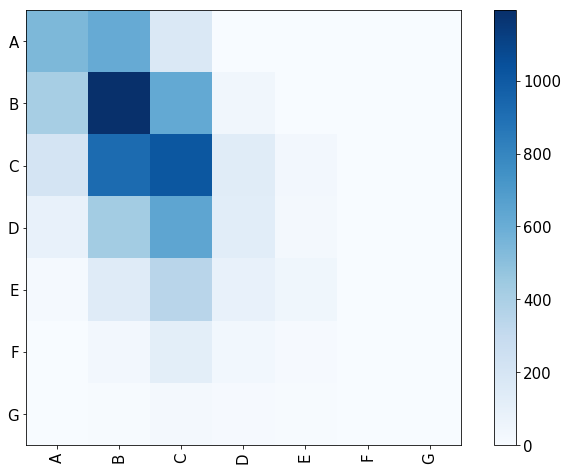

In [180]:
columns = ['A', 'B', 'C', 'D','E','F','G']

plt.imshow(confusion_KNN, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,], columns)
plt.colorbar()

plt.show()

In [181]:
print(classification_report(y_test_adj, y_hat2))

             precision    recall  f1-score   support

          1       0.43      0.41      0.42      1330
          2       0.36      0.52      0.43      2275
          3       0.34      0.44      0.39      2309
          4       0.29      0.10      0.15      1306
          5       0.35      0.07      0.11       639
          6       0.29      0.01      0.02       202
          7       0.00      0.00      0.00        48

avg / total       0.35      0.36      0.33      8109



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Comment:** KNN didn't work very well here. We mentioned above that KNN depends heavily on the data itself and is very sensitive to noises of the data. Finding a good K is not easy. Due to the limited time of this project, we will not keep trying different Ks.

### (5) Random Forest

**Characteristic:** Random forest is a more advanced model. It is a bagging model. In general, good accuracy can be achieved by this model. But it also involves a lot of calculations and Random Forest can easily result in overfitting due to its high complexity. Also, tuning the parameters of Random Forest is not very easy (choosing a good n_estimators).

Here we tuned the parameters by changing the search range of n_estimators. We also changed the max_depth in order deal with the problem of overfitting. In general, having more number of trees will increase the accuracy of the model, but it will take more time to compute. Therefore, we will not keep testing models with more number of trees. (In real life, there is also a cost for longer time of computation.)

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forest Regressor object
rf = RandomForestClassifier(criterion = "entropy",max_depth = 20, random_state = 10)


param_grid = {"n_estimators": [100, 300, 500, 700], }

grid_search2 = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv=5, return_train_score = True)
grid_search2.fit(x_train_nor, y_train_adj.ravel()) 


print("Scores on training set:")
means = grid_search2.cv_results_['mean_test_score']
stds = grid_search2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print(grid_search2.best_params_)

Scores on training set:
0.437 (+/-0.008) for {'n_estimators': 100}
0.442 (+/-0.012) for {'n_estimators': 300}
0.444 (+/-0.011) for {'n_estimators': 500}
0.445 (+/-0.012) for {'n_estimators': 700}
{'n_estimators': 700}


In [168]:
print(grid_search2.best_params_)

{'n_estimators': 700}


From the above result, we could see that with more trees, the results will become better. We can also get better results if we allow the maximum depth to become larger. But all of these will result in longer computation time. We will not keep trying larger number of trees due to time constraint.

In [172]:
Random_forest = grid_search2.best_estimator_.fit(x_train_nor, y_train_adj)
y_hat3 = Random_forest.predict(x_test_nor)
Random_forest_score = Random_forest.score(x_test_nor, y_test_adj)
print("Random Forest Scores on Testing set: ", end='')
print(Random_forest_score)

Random Forest Scores on Testing set: 0.4413614502404736


We can see that our training and testing sets have the similar scores. 

In [170]:
print(grid_search2.cv_results_)

{'mean_fit_time': array([ 5.21865549, 15.32481532, 26.48837018, 36.25920601]), 'std_fit_time': array([0.09454756, 0.22742463, 0.83678863, 0.40204292]), 'mean_score_time': array([0.11767683, 0.34070721, 0.62910376, 0.89321494]), 'std_score_time': array([0.00658997, 0.01270105, 0.06219845, 0.04296402]), 'param_n_estimators': masked_array(data=[100, 300, 500, 700],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 100}, {'n_estimators': 300}, {'n_estimators': 500}, {'n_estimators': 700}], 'split0_test_score': array([0.44256668, 0.44494323, 0.44969633, 0.45022445]), 'split1_test_score': array([0.43977813, 0.4429477 , 0.44770206, 0.45139989]), 'split2_test_score': array([0.43155391, 0.43789641, 0.43683932, 0.43816068]), 'split3_test_score': array([0.43484007, 0.45017182, 0.44699974, 0.44832144]), 'split4_test_score': array([0.43824385, 0.43321873, 0.43771489, 0.43850833]), 'mean_test_score': array([0.4373976 , 0.441

In [173]:
confusion_rf = confusion_matrix(y_test_adj, y_hat3)
confusion_rf

array([[ 680,  565,   84,    1,    0,    0,    0],
       [ 241, 1317,  698,   17,    2,    0,    0],
       [  70,  752, 1379,   93,   15,    0,    0],
       [   9,  243,  871,  143,   40,    0,    0],
       [   4,   52,  391,  130,   60,    2,    0],
       [   1,    5,  116,   52,   28,    0,    0],
       [   0,    1,   21,    9,   17,    0,    0]], dtype=int64)

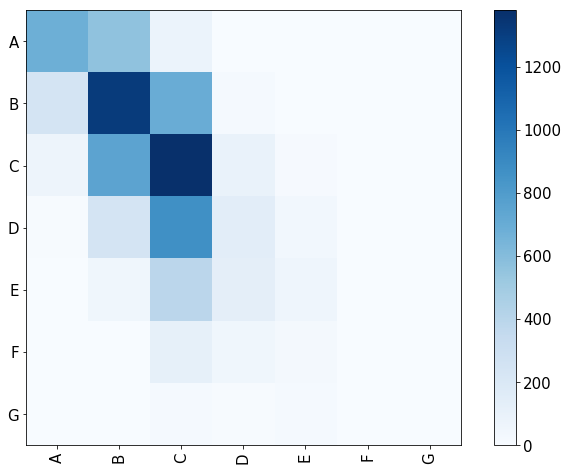

In [174]:
columns = ['A', 'B', 'C', 'D','E','F','G']

plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,], columns)
plt.colorbar()

plt.show()

In [175]:
print(classification_report(y_test_adj, y_hat3))

             precision    recall  f1-score   support

          1       0.68      0.51      0.58      1330
          2       0.45      0.58      0.51      2275
          3       0.39      0.60      0.47      2309
          4       0.32      0.11      0.16      1306
          5       0.37      0.09      0.15       639
          6       0.00      0.00      0.00       202
          7       0.00      0.00      0.00        48

avg / total       0.43      0.44      0.41      8109



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Comment:** We can see from the above results that Random Forest achieved very close score (45% accuracy) to Logistic Regression. The boundary of this problem might be this.

### (6) Desicion Tree

**Characteristic:** In order to compare with Random Forest, we also tested Decision Tree model using AdaBoostClassifier. Decision Tree is in general a good model if the input has a lot of categorical features. But tuning the parameters of decision tree is very difficult (when to cut nodes etc.).

In [193]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = AdaBoostClassifier(DecisionTreeClassifier(random_state = 1))

param_grid2 = {"base_estimator__criterion" : ["entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10,30, 50,70, 100, 120]
             }

grid_search3 = GridSearchCV(tree, param_grid=param_grid2, scoring='accuracy', cv=5, return_train_score = True)
grid_search3.fit(x_train_nor, y_train_adj.ravel()) 

print("Scores on training set:")
means = grid_search3.cv_results_['mean_test_score']
stds = grid_search3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print(grid_search3.best_params_)

Scores on training set:
0.330 (+/-0.019) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 10}
0.331 (+/-0.018) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 30}
0.330 (+/-0.008) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 50}
0.332 (+/-0.016) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 70}
0.330 (+/-0.016) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 100}
0.330 (+/-0.019) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 120}
0.324 (+/-0.019) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 10}
0.322 (+/-0.018) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 30}
0.324 (+/-0.011) for {'bas

In [194]:
print(grid_search3.cv_results_) 

{'mean_fit_time': array([0.5335556 , 0.51620474, 0.5166163 , 0.53917594, 0.52440224,
       0.52002907, 0.19428105, 0.19209647, 0.20387278, 0.19368787,
       0.20226679, 0.19289083]), 'std_fit_time': array([0.02292394, 0.01036526, 0.02019598, 0.02930279, 0.02852716,
       0.01765511, 0.00490476, 0.00661309, 0.0100181 , 0.01144546,
       0.00399624, 0.00563769]), 'mean_score_time': array([0.00260024, 0.00318613, 0.00298834, 0.00337868, 0.00379319,
       0.00339861, 0.00280561, 0.0029892 , 0.00337963, 0.00299959,
       0.00398779, 0.00337758]), 'std_score_time': array([4.94559478e-04, 4.01069194e-04, 6.23108715e-04, 9.99626643e-04,
       7.60409802e-04, 4.92822366e-04, 4.01798976e-04, 5.59466354e-06,
       1.00937542e-03, 1.18399732e-05, 8.90628653e-04, 4.86499747e-04]), 'param_base_estimator__criterion': masked_array(data=['entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                   'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                   'entropy', 

In [195]:
Decision_tree = grid_search3.best_estimator_.fit(x_train_nor, y_train_adj)
y_hat4 = Decision_tree.predict(x_test_nor)
Decision_tree_score = Decision_tree.score(x_test_nor, y_test_adj)
print("Decision Tree Scores on Testing set: ", end='')
print(Decision_tree_score)

Decision Tree Scores on Testing set: 0.3371562461462572


In [196]:
confusion_dt = confusion_matrix(y_test_adj, y_hat4)
confusion_dt

array([[611, 459, 186,  59,  13,   2,   0],
       [402, 872, 658, 236,  90,  17,   0],
       [213, 612, 794, 422, 205,  55,   8],
       [ 70, 272, 409, 297, 190,  63,   5],
       [ 17,  85, 191, 160, 129,  49,   8],
       [  2,  13,  48,  65,  42,  29,   3],
       [  0,   4,  14,  13,  12,   3,   2]], dtype=int64)

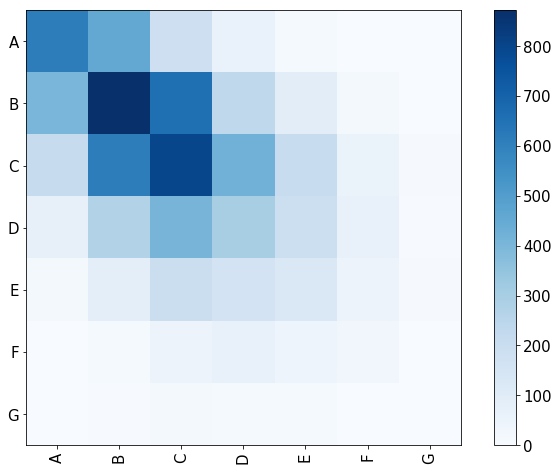

In [197]:
columns = ['A', 'B', 'C', 'D','E','F','G']

plt.imshow(confusion_dt, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,], columns)
plt.colorbar()

plt.show()

In [198]:
print(classification_report(y_test_adj, y_hat4))

             precision    recall  f1-score   support

          1       0.46      0.46      0.46      1330
          2       0.38      0.38      0.38      2275
          3       0.35      0.34      0.34      2309
          4       0.24      0.23      0.23      1306
          5       0.19      0.20      0.20       639
          6       0.13      0.14      0.14       202
          7       0.08      0.04      0.05        48

avg / total       0.34      0.34      0.34      8109



**Comment:** As expected, Decision Tree performed worse than Random Forest (Random Forest is actually a bagging model of Decision Tree). It may also result from the difficulty of tuning parameters of this model (when to cut nodes or how deep should the tree go.)

### (7) Neural Network

**Characteristic:** Due to the limited time we have, we tried MLPClassifier from sklearn first. We use grid search to find the best hidden_layer_sizes and best activation function. We expect Neural Network should be a good model due to its complexity. But again, finding a good number of layers and a good number of neurons is very difficult. Here we tested the following combinations through grid search:

In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
mlp = MLPClassifier(random_state=1234)

param_grid3 = {"hidden_layer_sizes" : [(5,5), (10,10), (50,50),(100,100), (5,5,5),(10,10,10),(50,50,50), (5,5,5,5),(10,10,10,10)],
              "activation" :   ["logistic", "tanh",'relu'],
             }

grid_search4 = GridSearchCV(mlp, param_grid=param_grid3, scoring='accuracy', cv=5, return_train_score = True)
grid_search4.fit(x_train_nor, y_train_adj.ravel()) 

print(grid_search4.cv_results_) 
print(grid_search4.best_params_)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

{'mean_fit_time': array([ 9.64968891, 12.21183333,  6.80573082,  6.84460821, 13.58487854,
       10.39344435,  7.04037442, 17.50046172, 12.65286593,  6.35351715,
        9.64436841, 21.180446  , 31.84604082,  7.57996144,  9.81937447,
       29.61713877,  9.00651817,  7.93664336,  5.98186393,  6.14873624,
       16.86914811, 30.81345887,  4.53793068,  3.86065054, 24.02465692,
        6.81745453,  5.63088908]), 'std_fit_time': array([1.14514764, 1.90593295, 1.6305253 , 1.16987487, 1.75035626,
       0.97795198, 0.40753858, 2.37206223, 0.90316442, 1.41753663,
       0.91961509, 1.01787146, 0.44802762, 2.96389738, 1.28682179,
       1.52503281, 2.56083523, 3.77356908, 0.3958399 , 0.98462306,
       5.55412728, 7.79309039, 1.51217887, 1.04842022, 8.56092132,
       1.5036448 , 1.95792332]), 'mean_score_time': array([0.00312352, 0.00448909, 0.01357036, 0.02420511, 0.00429974,
       0.00468383, 0.01698332, 0.00487986, 0.00644183, 0.0066359 ,
       0.00331779, 0.00839353, 0.0150311 , 0.00312

In [94]:
print(grid_search4.cv_results_['std_test_score'][grid_search4.best_index_])

0.0024283139379438993


In [95]:
Neural_network = grid_search4.best_estimator_.fit(x_train_nor, y_train_adj)

y_hat5 = Neural_network.predict(x_test_nor)

In [96]:
Neural_network_score = Neural_network.score(x_test_nor, y_test_adj)
Neural_network_score

0.4694783573806881

In [97]:
confusion_nn = confusion_matrix(y_test_adj, y_hat5)
confusion_nn

array([[ 791,  475,   62,    2,    0,    0,    0],
       [ 317, 1249,  667,   39,    3,    0,    0],
       [  66,  683, 1308,  208,   44,    0,    0],
       [  15,  165,  717,  298,  108,    3,    0],
       [   0,   27,  265,  188,  156,    3,    0],
       [   0,    5,   53,   61,   78,    5,    0],
       [   0,    0,    6,   12,   25,    5,    0]], dtype=int64)

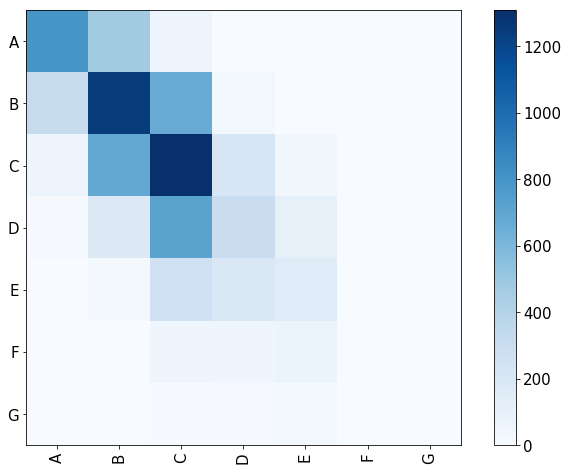

In [98]:
columns = ['A', 'B', 'C', 'D','E','F','G']

plt.imshow(confusion_nn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,], columns)
plt.colorbar()

plt.show()

In [99]:
print(classification_report(y_test_adj, y_hat5))

             precision    recall  f1-score   support

          1       0.67      0.59      0.63      1330
          2       0.48      0.55      0.51      2275
          3       0.42      0.57      0.49      2309
          4       0.37      0.23      0.28      1306
          5       0.38      0.24      0.30       639
          6       0.31      0.02      0.05       202
          7       0.00      0.00      0.00        48

avg / total       0.46      0.47      0.45      8109



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Comment:** As expected, Neural Network achieved the best score right now (even though it is a small improvement over Logistic Regression.)

### (8) Support Vector Machine

**Characteristic:** SVM constructs a hyperplane or a set of hyperplanes which separate the nearest data points of different classes by the largest distance. SVM should be a good model in our problem. It is a very powerful model when the classes are gathered together, which can not be dealt with well by Logistic Regression. Disadvantages of SVM are that it also computes very slowly and choosing a good C is not very easy.

In [109]:
from sklearn.svm import SVC

In [110]:
svm= SVC(kernel = "rbf", decision_function_shape = 'ovo')

param_grid4 = {"C":[1, 10, 15],
               "gamma" : [0.01, 0.1, 1],
             }

grid_search5 = GridSearchCV(svm, param_grid=param_grid4, scoring='accuracy', cv=5, return_train_score = True)
grid_search5.fit(x_train_nor, y_train_adj.ravel()) 

print(grid_search5.cv_results_) 
print(grid_search5.best_params_)

{'mean_fit_time': array([ 50.36420555,  48.83114219,  90.78964591,  42.47108269,
        48.90130219,  96.42813163,  41.37548575,  79.64817185,
       151.57883606]), 'std_fit_time': array([1.5525083 , 1.78649534, 6.7114703 , 1.06696625, 0.58602742,
       7.17457923, 6.00754986, 1.8041219 , 6.95237824]), 'mean_score_time': array([ 6.86770949,  6.88257051,  6.84242587,  6.57169728,  6.35886369,
        6.49208708,  7.27613807, 10.18646212, 11.78337297]), 'std_score_time': array([0.15647415, 0.24231103, 0.32450276, 0.27363679, 0.14583259,
       0.20295112, 2.1293957 , 1.16302886, 0.33625888]), 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 15, 15, 15],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1, 0.01, 0.1, 1, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
    

In [113]:
print(grid_search5.cv_results_['std_test_score'][grid_search5.best_index_])

0.003709351559680896


In [114]:
SVM= grid_search5.best_estimator_.fit(x_train_nor, y_train_adj)

y_hat6 = SVM.predict(x_test_nor)

In [115]:
svm_score = SVM.score(x_test_nor, y_test_adj)
svm_score

0.44407448513996794

In [116]:
confusion_svm = confusion_matrix(y_test_adj, y_hat6)
confusion_svm

array([[ 715,  539,   75,    1,    0,    0,    0],
       [ 262, 1288,  711,   13,    1,    0,    0],
       [  77,  709, 1454,   64,    5,    0,    0],
       [  19,  220,  922,  135,   10,    0,    0],
       [   3,   39,  472,  116,    9,    0,    0],
       [   0,    6,  134,   58,    4,    0,    0],
       [   0,    1,   28,   18,    1,    0,    0]], dtype=int64)

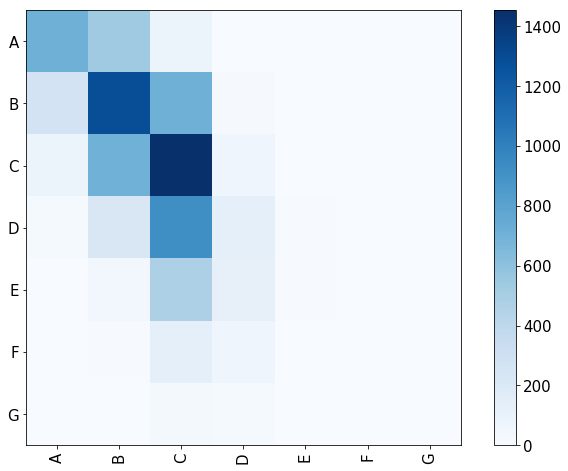

In [117]:
columns = ['A', 'B', 'C', 'D','E','F','G']
plt.imshow(confusion_svm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,], columns)
plt.colorbar()

plt.show()

In [118]:
print(classification_report(y_test_adj, y_hat6))

             precision    recall  f1-score   support

          1       0.66      0.54      0.59      1330
          2       0.46      0.57      0.51      2275
          3       0.38      0.63      0.48      2309
          4       0.33      0.10      0.16      1306
          5       0.30      0.01      0.03       639
          6       0.00      0.00      0.00       202
          7       0.00      0.00      0.00        48

avg / total       0.42      0.44      0.40      8109



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Comment:** Again, through tuning parameters, we achieved good scores by SVM. It is very close to Random Forest and Logistic Regression. We have not tested different gamma for rbf function (it took a very long time to run SVM algorithms). Improvement can be achieved through more parameters tuning.

### (9) Naive Bayes

**Characteristic:** For the comparison purpose, we also tried Naive Bayes Model. NB makes very strong assumption that the presence of a particular feature in a class is unrelated to the presence of any other features. However, in the real world, features are usually correlated with each other. A good thing about NB is that it computes very fast.

In [199]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [207]:
param_grid5 = {"alpha" : [0.05, 0.1, 0.2, 0.5], 
             }

grid_search6 = GridSearchCV(NB, param_grid=param_grid5, scoring='accuracy', cv=5, return_train_score = True)
grid_search6.fit(x_train_nor, y_train_adj.ravel()) 

print(grid_search6.cv_results_) 
print(grid_search6.best_params_)

{'mean_fit_time': array([0.03571148, 0.04069333, 0.03730087, 0.0396946 ]), 'std_fit_time': array([0.00435101, 0.00291792, 0.00354497, 0.00347735]), 'mean_score_time': array([0.00179305, 0.0011961 , 0.00159535, 0.00219374]), 'std_score_time': array([0.00039847, 0.00039866, 0.0004886 , 0.0009764 ]), 'param_alpha': masked_array(data=[0.05, 0.1, 0.2, 0.5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.05}, {'alpha': 0.1}, {'alpha': 0.2}, {'alpha': 0.5}], 'split0_test_score': array([0.38315289, 0.38315289, 0.38315289, 0.38315289]), 'split1_test_score': array([0.36740623, 0.36740623, 0.36767036, 0.3671421 ]), 'split2_test_score': array([0.37315011, 0.37315011, 0.37315011, 0.37394292]), 'split3_test_score': array([0.38038594, 0.38091462, 0.38091462, 0.38091462]), 'split4_test_score': array([0.37476858, 0.37476858, 0.3745041 , 0.37423962]), 'mean_test_score': array([0.37577295, 0.37587865, 0.37587865, 0.37587865]), 'std

In [208]:
print(grid_search6.cv_results_['std_test_score'][grid_search6.best_index_])

0.005635573317624917


In [209]:
Native_B = grid_search6.best_estimator_.fit(x_train_nor, y_train_adj)

y_hat7 =Native_B.predict(x_test_nor)

In [210]:
NB_score =Native_B.score(x_test_nor, y_test_adj)
NB_score

0.3703292637809841

In [211]:
confusion_NB = confusion_matrix(y_test_adj, y_hat7)
confusion_NB

array([[ 310,  849,  167,    3,    1,    0,    0],
       [ 154, 1352,  752,   15,    2,    0,    0],
       [  66,  932, 1253,   46,   12,    0,    0],
       [  15,  385,  816,   73,   17,    0,    0],
       [   5,   95,  463,   61,   15,    0,    0],
       [   2,   10,  153,   28,    9,    0,    0],
       [   0,    1,   37,    7,    3,    0,    0]], dtype=int64)

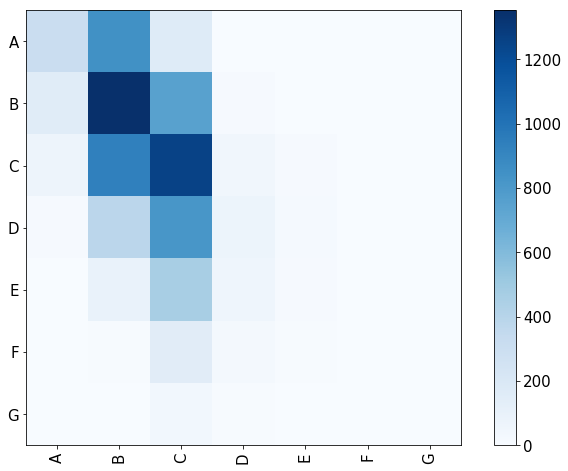

In [212]:
columns = ['A', 'B', 'C', 'D','E','F','G']

plt.imshow(confusion_NB, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5,6,], columns)
plt.colorbar()

plt.show()

In [213]:
print(classification_report(y_test_adj, y_hat7))

             precision    recall  f1-score   support

          1       0.56      0.23      0.33      1330
          2       0.37      0.59      0.46      2275
          3       0.34      0.54      0.42      2309
          4       0.31      0.06      0.09      1306
          5       0.25      0.02      0.04       639
          6       0.00      0.00      0.00       202
          7       0.00      0.00      0.00        48

avg / total       0.37      0.37      0.32      8109



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Comment:** As expected, Naive Bayes did not achieve good scores since its assumption is very strong. 

### (10) Neural Network Using Keras

Since we have some extra time, we also tried Neural Network using Keras. Keras is more convenient for parameters tuning work.

In [1]:
import keras
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import np_utils

C:\Users\lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\lenovo\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.

Converted the 7 classes into 7 dummies using np_utils.to_categorical.

In [33]:
adj = np.array([-1] * len(y_train_adj))
y_train_adj2 = adj + y_train_adj
y_train_adj2

array([1, 2, 3, ..., 2, 2, 3])

In [34]:
dummy_y_train = np_utils.to_categorical(y_train_adj2)
dummy_y_train.shape

(18921, 7)

In [35]:
adj = np.array([-1] * len(y_test_adj))
y_test_adj2 = adj + y_test_adj
y_test_adj

array([5, 2, 1, ..., 5, 4, 5])

In [36]:
dummy_y_test = np_utils.to_categorical(y_test_adj2)
dummy_y_test.shape

(8109, 7)

Implement the Neural Network. Note that we have tried many different combinations of hidden layers and neurons.

In [37]:
NN_1 = models.Sequential()

NN_1.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(x_train_nor.shape[1],)))
NN_1.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#NN_1.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#NN_1.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.001),activation='relu'))


NN_1.add(layers.Dense(7,activation='sigmoid'))
NN_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history_1 = NN_1.fit(x_train_nor,dummy_y_train,epochs = 100,verbose = 0, validation_data = (x_test_nor,dummy_y_test));

NN_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 231       
Total params: 1,863
Trainable params: 1,863
Non-trainable params: 0
_________________________________________________________________


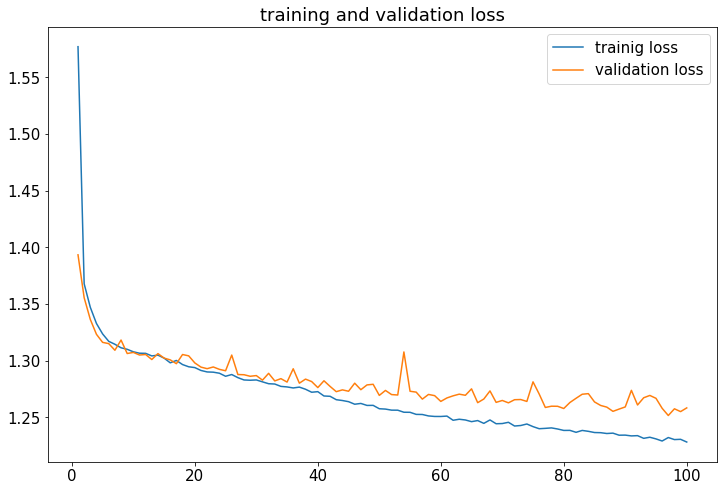

In [38]:
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']
epochs_1 = range(1,len(loss_1)+1)
plt.plot(epochs_1,loss_1,label='trainig loss')
plt.plot(epochs_1,val_loss_1,label='validation loss')
plt.title('training and validation loss')
plt.legend()

The picture of traning and validation loss looks good.

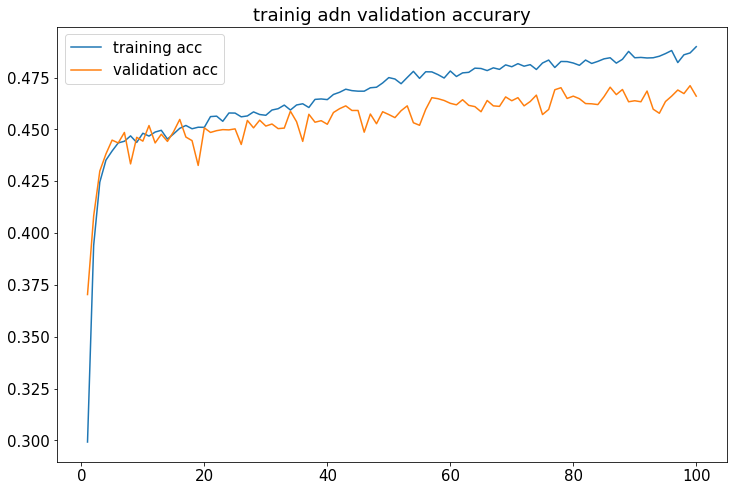

In [39]:
acc_1 = history_1.history['acc']
val_acc_1 = history_1.history['val_acc']
epochs_1 = range(1,len(acc_1)+1)

plt.plot(epochs_1,acc_1,label ='training acc')
plt.plot(epochs_1, val_acc_1,label = 'validation acc')
plt.title('trainig adn validation accurary')
plt.legend()

Overfitting is not very high.

In [43]:
lo_1,ac_1 = NN_1.evaluate(x_test_nor,dummy_y_test)
print('loss',lo_1)
print('acc',ac_1)

8109/8109 [==============================] - 0s 17us/step
loss 1.2584511539706438
acc 0.4660254038906168


Neural Network using Keras achieved very similar scores with Neural Network using MLPClassifier. We believed that this might be the best score we can get in this classification problem.

## 5. Evaluate the models and Future Improvement

We are now reaching the end of this project. Let's first examine the results got from all the models:

### (1) Comparing all the models

In [214]:
models = { }
models['Classifier'] = ['Logistic Regeression','KNN','Random Forest', 'Decision Tree', 'Neural Network','SVM', 'Naive Bayes']
models['Scores'] = [Logistic_Regression_score, KNN_score, Random_forest_score, Decision_tree_score, Neural_network_score, svm_score, NB_score]
results = pd.DataFrame(models)
results

,Classifier,Scores
0,Logistic Regeression,0.453940
1,KNN,0.360217
2,Random Forest,0.441361
3,Decision Tree,0.337156
4,Neural Network,0.469478
5,SVM,0.444074
6,Naive Bayes,0.370329


Let's recall the distribution of the classes in the test data:

In [42]:
Percentage

C    28.47
B    28.06
A    16.40
D    16.11
E     7.88
F     2.49
G     0.59
dtype: float64

We can see that all the models have achieved higher accuracy scores than both randomly guessing (14.29\%) and guessing the largest class (28.47\%). That is to say, our models are doing something. 

However, even the best model only got a cross\-validation accuracy score around 47\%. This implies that although our model is three times better than randomly guessing, it still only classified half of the P2P loans correctly. This can be costly in reality. 

Also, as the confusion matrices indicated, our model does not have a great predictive power over loans which were rated in lower grades like "F" or "G". 

Among all the models, **Neural Network** using MLPClassifier achieved highest scores (46.95%), which is reasonable since it is a very complex model and we allowed the grid search to test more parameters. 

Logistic Regression, Random Forest and SVM got very close scores to Neural Network (2% differences). **SVM** is a very good model for almost all the classification problems. But it computes slowly and tuning the parameters is not very easy. We could expect that SVM can get better scores if we test on larger C and smaller gamma. 

**Random Forest** is a bagging model. It showed good result due to its complexity. We could also increase the number of trees to increase the complexity but the risk of overfitting will also increase. In that case, we may want to limit the maximum depth of the model.

**Logistic Regression** computes very fast and it got similarly good results as those complex models. This may be because that most of our features are continuous variables which are distributed nicely. This has shown that everytime we have a classification problem, we should always try Logistic Regression first and see what we can get.

**KNN** performed poorly in this problem. It also computed very slowly. As I have mentioned above, KNN is very sensitive to random noise in the data and it is not very easy to find a good K.

**Decision Tree** got similarly bad result as KNN. There are many things we need to decide when using the Decision Tree model including when to cut the nodes and how deep we should allow the tree to go. All of these parameters are not easy to figure out clearly. Due to the limited time we have, we do not have the chance to test more different parameters.

**Naive Bayes** did not perform well. It makes very strong assumption about the features. However, in our problem, obviously many of the features are correlated with each other to some extent. That's may be the reason why Naive Bayes did not do a good job.

### (2) Future Improvement

Hence, there is much space for improvement. Here are some of them:

First of all, we only use a small portion of the data due to the limit of our laptops computational capacity. With the help of HPC, we can test the models using the whole dataset, which may give us very different results.

Secondly, due to the limited time, we did not test the models using a lot of different parameters. Algorithms like KNN, Decision Tree, SVM are sensitive to the parameters and we may get better results if more parameters tuning work could be done.

Thirdly, we may want to test the stacking model in more details. We can apply different meta classifier functions or test different combinations of first-level classifiers in order to achieve better results.

Lastly, we may want to balance the class distribution in the training data in order to make our model have more predictive power over loans with lower grades. This can be done by manually adding more observations with lower classes into the training data.

However, we also need to admit that there is certain limit existing about the best performance of machine learning algorithms on a specific classification problem. In some cases, the data itself does not have a very nice distribution and all the classes are just gathered together, which can result in great difficulty classifying them well.

### (3) Stacking (Just for testing purpose)

Lastly, since we do not have any chances in this course to test the ensemble methods, here we tested the stacking model using a linear Logistic Regression model to combine the results. Let's see what we have:

In [120]:
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [263]:
stacking = StackingClassifier(classifiers=[Logistic_Reg, grid_search, grid_search2, grid_search3, grid_search4, grid_search5, grid_search6], meta_classifier=LogisticRegression())

for clm, label in zip([Logistic_Reg, grid_search, grid_search2, grid_search3, grid_search4, grid_search5, grid_search6, stacking], 
                      ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'Neutral Network', 'SVM', 'Naive Bayes', 'StackingClassifier']):
    scores = model_selection.cross_val_score(clm, x_train_nor, y_train_adj,  cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.45 (+/- 0.00) [Logistic Regression]
Accuracy: 0.33 (+/- 0.01) [KNN]
Accuracy: 0.45 (+/- 0.00) [Random Forest]
Accuracy: 0.34 (+/- 0.01) [Decision Tree]
Accuracy: 0.45 (+/- 0.00) [Neutral Network]
Accuracy: 0.43 (+/- 0.00) [SVM]
Accuracy: 0.38 (+/- 0.01) [Naive Bayes]
Accuracy: 0.41 (+/- 0.01) [StackingClassifier]


Due to the time constraint, we did not test different meta classifier functions or test different combinations of first level classifiers. Future work can explore this in detail.

## 6. References of Source Code

Here are all the websites, related works and documents we have referred to. For the literature review part, please check the final paper for details.

Sklearn:
- LabelEncoder instruction: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- LogisticRegressionCV instruction: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
- KNeighborsClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- MultinomialNB instruction: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
- RandomForestClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- DecisionTreeClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- MLPClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- SVC instruction: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Keras:
- Keras Instruction: https://keras.io/models/model/
- Loss Definition: https://keras.io/losses/
- Multiclass classification tutorial: https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

How to tuning parameters (Some documents are in Chinese):
- LogisticRegressionCV summary: https://www.cnblogs.com/pinard/p/6035872.html
- KNeighborsClassifier example and summary: https://zhuanlan.zhihu.com/p/23191325
- How to choose a good K: https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification
- RandomForestClassifier summary: http://www.cnblogs.com/pinard/p/6160412.html
- DecisionTreeClassifier summary: https://www.jianshu.com/p/78594737b4b4
- MLPClassifier example and summary: https://blog.csdn.net/u011311291/article/details/78743393
- MLPClassifier parameters analysis: https://blog.csdn.net/Mrzhang0419/article/details/79519994
- Basics of Naive Bayes: https://harshanavalkar.blogspot.com/2018/10/basics-of-naive-bayes-algorithm-data.html
- SVC summary: https://blog.csdn.net/github_39261590/article/details/75009069
- SVC example: https://blog.csdn.net/SummerStoneS/article/details/78551757
- Prior selection of SVM class_weight: https://stats.stackexchange.com/questions/24959/a-priori-selection-of-svm-class-weights?rq=1
- StackClassifier parameters analysis: https://blog.csdn.net/github_35965351/article/details/60763606

Other documents and related works we refered to:
- Example of Random Forest Classification with CV: https://www.kaggle.com/akp1596/titanic-problem-random-forest-classifier-with-cv
- Ensemble Methods example: https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb
- Multiclass classification example: https://github.com/sundeeppothula1993/Multi-class-classification/blob/master/Multi-class%2BClassification.ipynb
- Guidance to encode categorical values: http://pbpython.com/categorical-encoding.html
- Professor Enric Junque de Fortuny's Machine Learning Notes: http://10.208.12.75/book/index.html
